In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from keras.models import Sequential

# import the core layers:
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.models import Model
from keras.utils import np_utils

In [ ]:
d = pd.read_csv('/content/drive/MyDrive/IPD/CTGAN_new_60000.csv')
d = d.replace({'rice': 0, 'maize': 1, 'chickpea': 2, 'lentil': 3, 'pomegranate': 4, 'banana': 5, 'mango': 6, 'grapes': 7, 'apple': 8, 'orange': 9, 'cotton': 10, 'coffee': 11})

In [ ]:
d

,Unnamed: 0,N,P,K,S,Fe,Zn,temperature,humidity,ph,rainfall,label
0,0,114,36,34,21,6,12,24.956179,82.877346,8.101090,281.568586,0
1,1,92,39,16,25,4,31,23.331957,69.630598,7.314633,68.674883,1
2,2,67,59,78,13,10,43,18.752991,21.212009,7.442990,92.089206,2
3,3,11,58,14,7,7,61,26.405158,70.678371,7.373532,40.266762,3
4,4,10,14,39,30,3,3,21.095362,93.713395,6.076303,104.313771,4
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,2,137,201,31,37,32,26.312399,84.723157,7.470779,66.684250,7
59996,59996,40,124,200,37,62,27,24.563893,92.160713,6.033880,111.952151,8
59997,59997,10,11,5,38,10,8,8.838381,93.307221,7.420286,106.249639,9
59998,59998,127,60,21,7,100,47,24.839025,77.381837,7.092913,68.320204,10


In [ ]:
d.drop(columns = ['Unnamed: 0','humidity'], inplace = True)
d.shape

(60000, 10)

In [ ]:
X = d.iloc[:,:-1]
y = d.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## GridSearchCV Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestClassifier(random_state = 1002)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 1)

grid_search

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1002),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=1)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)
grid_accuracy

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose = 2, random_state = 1002, n_jobs = -1)

In [ ]:
rf = RandomForestClassifier(n_estimators = 200, max_depth = 20, random_state = 1002)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
z = accuracy_score(y_test,y_pred)
print(z)

0.9189166666666667


## SVM

In [ ]:
svmClassifier = svm.SVC(kernel = 'linear', C = 1, probability = True, gamma = 'auto', random_state = 1802)
svmClassifier.fit(X_train, y_train)
y_predict_svm = svmClassifier.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_predict_svm))

0.89225


In [ ]:
print(classification_report(y_test, y_predict_svm))

              precision    recall  f1-score   support

           0       0.71      0.60      0.65      1035
           1       0.84      0.92      0.88       995
           2       0.98      0.99      0.99       971
           3       0.97      0.98      0.97      1016
           4       0.86      0.90      0.88       953
           5       0.97      0.99      0.98       985
           6       0.87      0.92      0.90      1010
           7       0.97      0.98      0.97       971
           8       0.99      0.97      0.98      1037
           9       0.91      0.91      0.91      1038
          10       0.97      0.97      0.97      1057
          11       0.60      0.55      0.57       932

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
abc_rf = AdaBoostClassifier(n_estimators = 50, estimator = rf,learning_rate=0.1)
model_rf = abc_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

## CNN

In [ ]:
input1 = Input(shape=(X_train.shape[1],))
dense_1 = Dense(100, activation='sigmoid')(input1)
dense_3 = Dense(12, activation='softmax')(dense_1)
model = Model(input1, dense_3)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
y_train1 = np_utils.to_categorical(y_train, 12)
y_test1 = np_utils.to_categorical(y_test, 12)
model.fit(X_train, y_train1, epochs=10, validation_split = 0.2)
y_predict = model.predict(X_test, verbose=1)
print(y_predict.shape)
# Evaluation:
score = model.evaluate(X_test, y_test1, verbose=1)
print('The accuracy is: ', score[1])

Epoch 1/10
1200/1200 [==============================] - 7s 5ms/step - loss: 0.6484 - accuracy: 0.8295 - val_loss: 0.4064 - val_accuracy: 0.8721
Epoch 2/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.3846 - accuracy: 0.8795 - val_loss: 0.3644 - val_accuracy: 0.8799
Epoch 3/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3520 - accuracy: 0.8874 - val_loss: 0.3413 - val_accuracy: 0.8888
Epoch 4/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3332 - accuracy: 0.8926 - val_loss: 0.3284 - val_accuracy: 0.8929
Epoch 5/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3187 - accuracy: 0.8959 - val_loss: 0.3155 - val_accuracy: 0.8988
Epoch 6/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3101 - accuracy: 0.8991 - val_loss: 0.3142 - val_accuracy: 0.8977
Epoch 7/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.3044 - accuracy: 0.9002 - val_loss: 0.3076 - val_accuracy:

In [ ]:
input1 = Input(shape=(X_train.shape[1],))
dense_1 = Dense(100, activation='sigmoid')(input1)
dense_2 = Dense(200, activation='sigmoid')(dense_1)
dense_3 = Dense(100, activation='sigmoid')(dense_2)
dense_4 = Dense(12, activation='softmax')(dense_3)
model = Model(input1, dense_4)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
y_train1 = np_utils.to_categorical(y_train, 12)
y_test1 = np_utils.to_categorical(y_test, 12)
model.fit(X_train, y_train1, epochs=10, validation_split = 0.2)
y_predict = model.predict(X_test, verbose=1)
print(y_predict.shape)
# Evaluation:
score = model.evaluate(X_test, y_test1, verbose=1)
print('The accuracy is: ', score[1])

Epoch 1/10
1200/1200 [==============================] - 6s 5ms/step - loss: 0.6518 - accuracy: 0.8103 - val_loss: 0.3737 - val_accuracy: 0.8794
Epoch 2/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3681 - accuracy: 0.8802 - val_loss: 0.3465 - val_accuracy: 0.8878
Epoch 3/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3466 - accuracy: 0.8883 - val_loss: 0.3330 - val_accuracy: 0.8891
Epoch 4/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3337 - accuracy: 0.8918 - val_loss: 0.3248 - val_accuracy: 0.8889
Epoch 5/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3236 - accuracy: 0.8957 - val_loss: 0.3140 - val_accuracy: 0.8957
Epoch 6/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3159 - accuracy: 0.8970 - val_loss: 0.3145 - val_accuracy: 0.8931
Epoch 7/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3102 - accuracy: 0.8989 - val_loss: 0.3152 - val_accuracy:

In [ ]:
input1 = Input(shape=(X_train.shape[1],))
dense_1 = Dense(100, activation='sigmoid')(input1)
dense_2 = Dense(200, activation='sigmoid')(dense_1)
dense_3 = Dense(400, activation='sigmoid')(dense_2)
dense_4 = Dense(200, activation='sigmoid')(dense_3)
dense_5 = Dense(100, activation='sigmoid')(dense_4)
dense_6 = Dense(12, activation='softmax')(dense_5)
model = Model(input1, dense_6)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
y_train1 = np_utils.to_categorical(y_train, 12)
y_test1 = np_utils.to_categorical(y_test, 12)
model.fit(X_train, y_train1, epochs=10, validation_split = 0.2)
y_predict = model.predict(X_test, verbose=1)
print(y_predict.shape)
# Evaluation:
score = model.evaluate(X_test, y_test1, verbose=1)
print('The accuracy is: ', score[1])

Epoch 1/10
1200/1200 [==============================] - 11s 8ms/step - loss: 0.8811 - accuracy: 0.6951 - val_loss: 0.4162 - val_accuracy: 0.8702
Epoch 2/10
1200/1200 [==============================] - 12s 10ms/step - loss: 0.4093 - accuracy: 0.8718 - val_loss: 0.3820 - val_accuracy: 0.8740
Epoch 3/10
1200/1200 [==============================] - 10s 8ms/step - loss: 0.3779 - accuracy: 0.8795 - val_loss: 0.3620 - val_accuracy: 0.8847
Epoch 4/10
1200/1200 [==============================] - 9s 8ms/step - loss: 0.3619 - accuracy: 0.8837 - val_loss: 0.3545 - val_accuracy: 0.8842
Epoch 5/10
1200/1200 [==============================] - 10s 9ms/step - loss: 0.3505 - accuracy: 0.8880 - val_loss: 0.3434 - val_accuracy: 0.8908
Epoch 6/10
1200/1200 [==============================] - 9s 8ms/step - loss: 0.3406 - accuracy: 0.8903 - val_loss: 0.3327 - val_accuracy: 0.8927
Epoch 7/10
1200/1200 [==============================] - 10s 8ms/step - loss: 0.3327 - accuracy: 0.8936 - val_loss: 0.3505 - val_acc

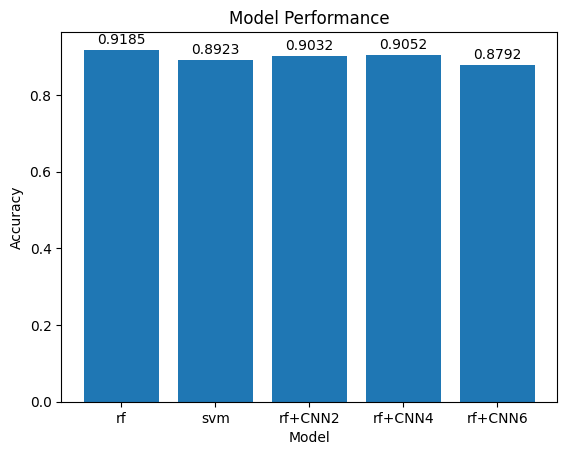

In [ ]:
import matplotlib.pyplot as plt

x_axis = ['rf','svm','rf+CNN2','rf+CNN4','rf+CNN6']
y_axis = [0.9185,0.8923,0.9032,0.9052,0.8792]

plot = plt.bar(x_axis, y_axis)
plt.title('Model Performance')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.bar_label(plot,labels=y_axis,label_type='edge',padding=2)
plt.show()

In [ ]:
df1 = pd.read_csv('data1.csv')
df2 = pd.read_csv('data2.csv')
df3 = pd.read_csv('data3.csv')
df4 = pd.read_csv('data4.csv')
df5 = pd.read_csv('data5.csv')
df51 = pd.read_csv('dataN5.csv')
df61 = pd.read_csv('dataN6.csv')
df71 = pd.read_csv('dataN7.csv')
df81 = pd.read_csv('dataN8.csv')

d1 = pd.read_csv('d1.csv')
d2 = pd.read_csv('d2.csv')
d3 = pd.read_csv('d3.csv')
d4 = pd.read_csv('d4.csv')
d5 = pd.read_csv('d5.csv')

FileNotFoundError: ignored

In [ ]:
df1.drop(columns = ['Unnamed: 0'], inplace = True)
df2.drop(columns = ['Unnamed: 0'], inplace = True)
df3.drop(columns = ['Unnamed: 0'], inplace = True)
df4.drop(columns = ['Unnamed: 0'], inplace = True)
df5.drop(columns = ['Unnamed: 0'], inplace = True)
df51.drop(columns = ['Unnamed: 0'], inplace = True)
df61.drop(columns = ['Unnamed: 0'], inplace = True)
df71.drop(columns = ['Unnamed: 0'], inplace = True)
df81.drop(columns = ['Unnamed: 0'], inplace = True)

d1.drop(columns = ['Unnamed: 0'], inplace = True)
d2.drop(columns = ['Unnamed: 0'], inplace = True)
d3.drop(columns = ['Unnamed: 0'], inplace = True)
d4.drop(columns = ['Unnamed: 0'], inplace = True)
d5.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
df1 = df1.replace({'rice': 0, 'maize': 1, 'chickpea': 2, 'lentil': 3, 'pomegranate': 4, 'banana': 5, 'mango': 6, 'grapes': 7, 'apple': 8, 'orange': 9, 'cotton': 10, 'coffee': 11})
df2 = df2.replace({'rice': 0, 'maize': 1, 'chickpea': 2, 'lentil': 3, 'pomegranate': 4, 'banana': 5, 'mango': 6, 'grapes': 7, 'apple': 8, 'orange': 9, 'cotton': 10, 'coffee': 11})
df3 = df3.replace({'rice': 0, 'maize': 1, 'chickpea': 2, 'lentil': 3, 'pomegranate': 4, 'banana': 5, 'mango': 6, 'grapes': 7, 'apple': 8, 'orange': 9, 'cotton': 10, 'coffee': 11})
df4 = df4.replace({'rice': 0, 'maize': 1, 'chickpea': 2, 'lentil': 3, 'pomegranate': 4, 'banana': 5, 'mango': 6, 'grapes': 7, 'apple': 8, 'orange': 9, 'cotton': 10, 'coffee': 11})
df5 = df5.replace({'rice': 0, 'maize': 1, 'chickpea': 2, 'lentil': 3, 'pomegranate': 4, 'banana': 5, 'mango': 6, 'grapes': 7, 'apple': 8, 'orange': 9, 'cotton': 10, 'coffee': 11})
df51 = df51.replace({'rice': 0, 'maize': 1, 'chickpea': 2, 'lentil': 3, 'pomegranate': 4, 'banana': 5, 'mango': 6, 'grapes': 7, 'apple': 8, 'orange': 9, 'cotton': 10, 'coffee': 11})
df61 = df61.replace({'rice': 0, 'maize': 1, 'chickpea': 2, 'lentil': 3, 'pomegranate': 4, 'banana': 5, 'mango': 6, 'grapes': 7, 'apple': 8, 'orange': 9, 'cotton': 10, 'coffee': 11})
df71 = df71.replace({'rice': 0, 'maize': 1, 'chickpea': 2, 'lentil': 3, 'pomegranate': 4, 'banana': 5, 'mango': 6, 'grapes': 7, 'apple': 8, 'orange': 9, 'cotton': 10, 'coffee': 11})
df81 = df81.replace({'rice': 0, 'maize': 1, 'chickpea': 2, 'lentil': 3, 'pomegranate': 4, 'banana': 5, 'mango': 6, 'grapes': 7, 'apple': 8, 'orange': 9, 'cotton': 10, 'coffee': 11})

In [ ]:
d1 = d1.replace({'rice': 0, 'maize': 1, 'chickpea': 2, 'lentil': 3, 'pomegranate': 4, 'banana': 5, 'mango': 6, 'grapes': 7, 'apple': 8, 'orange': 9, 'cotton': 10, 'coffee': 11})
d2 = d2.replace({'rice': 0, 'maize': 1, 'chickpea': 2, 'lentil': 3, 'pomegranate': 4, 'banana': 5, 'mango': 6, 'grapes': 7, 'apple': 8, 'orange': 9, 'cotton': 10, 'coffee': 11})
d3 = d3.replace({'rice': 0, 'maize': 1, 'chickpea': 2, 'lentil': 3, 'pomegranate': 4, 'banana': 5, 'mango': 6, 'grapes': 7, 'apple': 8, 'orange': 9, 'cotton': 10, 'coffee': 11})
d4 = d4.replace({'rice': 0, 'maize': 1, 'chickpea': 2, 'lentil': 3, 'pomegranate': 4, 'banana': 5, 'mango': 6, 'grapes': 7, 'apple': 8, 'orange': 9, 'cotton': 10, 'coffee': 11})
d5 = d5.replace({'rice': 0, 'maize': 1, 'chickpea': 2, 'lentil': 3, 'pomegranate': 4, 'banana': 5, 'mango': 6, 'grapes': 7, 'apple': 8, 'orange': 9, 'cotton': 10, 'coffee': 11})

In [ ]:
df81

,N,P,K,S,Fe,Zn,temperature,humidity,ph,rainfall,label
0,120,87,22,24,1,39,22.353398,77.264643,5.882813,103.201597,0
1,119,57,41,45,68,33,23.188260,77.807440,5.401141,116.288489,1
2,113,54,48,5,11,30,18.594445,14.258040,7.113361,80.839283,2
3,0,84,33,8,13,79,15.053746,64.935381,7.318854,38.844471,3
4,33,44,30,19,5,2,19.983440,88.033583,6.978892,97.457283,4
...,...,...,...,...,...,...,...,...,...,...,...
307195,2,92,36,52,45,51,20.890681,77.532683,5.790386,52.284005,7
307196,37,35,205,25,12,41,18.825376,90.874273,7.625115,110.445908,8
307197,47,39,29,45,53,21,20.940993,85.705859,6.300294,96.960491,9
307198,19,37,34,4,113,34,21.839642,76.740364,6.132994,97.279923,10


In [ ]:
X1 = df1.iloc[:,:-1]
y1 = df1.iloc[:,-1]
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=0)

In [ ]:
X2 = df2.iloc[:,:-1]
y2 = df2.iloc[:,-1]
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.2,random_state=0)

In [ ]:
X3 = df3.iloc[:,:-1]
y3 = df3.iloc[:,-1]
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,test_size=0.2,random_state=0)

In [ ]:
X4 = df4.iloc[:,:-1]
y4 = df4.iloc[:,-1]
X4_train,X4_test,y4_train,y4_test=train_test_split(X4,y4,test_size=0.2,random_state=0)

In [ ]:
X5 = df5.iloc[:,:-1]
y5 = df5.iloc[:,-1]
X5_train,X5_test,y5_train,y5_test=train_test_split(X5,y5,test_size=0.2,random_state=0)

In [ ]:
X51 = df51.iloc[:,:-1]
y51 = df51.iloc[:,-1]
X51_train,X51_test,y51_train,y51_test=train_test_split(X51,y51,test_size=0.2,random_state=0)

In [ ]:
X6 = df61.iloc[:,:-1]
y6 = df61.iloc[:,-1]
X6_train,X6_test,y6_train,y6_test=train_test_split(X6,y6,test_size=0.2,random_state=0)

In [ ]:
X7 = df71.iloc[:,:-1]
y7 = df71.iloc[:,-1]
X7_train,X7_test,y7_train,y7_test=train_test_split(X7,y7,test_size=0.2,random_state=0)

In [ ]:
X8 = df81.iloc[:,:-1]
y8 = df81.iloc[:,-1]
X8_train,X8_test,y8_train,y8_test=train_test_split(X8,y8,test_size=0.2,random_state=0)

In [ ]:
X11 = d1.iloc[:,:-1]
y11 = d1.iloc[:,-1]
X11_train,X11_test,y11_train,y11_test=train_test_split(X11,y11,test_size=0.2,random_state=0)

In [ ]:
X12 = d2.iloc[:,:-1]
y12 = d2.iloc[:,-1]
X12_train,X12_test,y12_train,y12_test=train_test_split(X12,y12,test_size=0.2,random_state=0)

In [ ]:
X13 = d3.iloc[:,:-1]
y13 = d3.iloc[:,-1]
X13_train,X13_test,y13_train,y13_test=train_test_split(X13,y13,test_size=0.2,random_state=0)

In [ ]:
X14 = d4.iloc[:,:-1]
y14 = d4.iloc[:,-1]
X14_train,X14_test,y14_train,y14_test=train_test_split(X14,y14,test_size=0.2,random_state=0)

In [ ]:
X15 = d5.iloc[:,:-1]
y15 = d5.iloc[:,-1]
X15_train,X15_test,y15_train,y15_test=train_test_split(X15,y15,test_size=0.2,random_state=0)

In [ ]:
results = []
tests = []
rf = RandomForestClassifier()
rf.fit(X1_train,y1_train)
y1_pred=rf.predict(X1_test)
tests.append(y1_test)
results.append(y1_pred)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X2_train,y2_train)
y2_pred=rf.predict(X2_test)
tests.append(y2_test)
results.append(y2_pred)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X3_train,y3_train)
y3_pred=rf.predict(X3_test)
tests.append(y3_test)
results.append(y3_pred)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X4_train,y4_train)
y4_pred=rf.predict(X4_test)
tests.append(y4_test)
results.append(y4_pred)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X5_train,y5_train)
y5_pred=rf.predict(X5_test)
tests.append(y5_test)
results.append(y5_pred)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X51_train,y51_train)
y51_pred=rf.predict(X51_test)
tests.append(y51_test)
results.append(y51_pred)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X6_train,y6_train)
y6_pred=rf.predict(X6_test)
tests.append(y6_test)
results.append(y6_pred)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X7_train,y7_train)
y7_pred=rf.predict(X7_test)
tests.append(y7_test)
results.append(y7_pred)

KeyboardInterrupt: ignored

In [ ]:
rf = RandomForestClassifier()
rf.fit(X8_train,y8_train)
y8_pred=rf.predict(X8_test)
tests.append(y8_test)
results.append(y8_pred)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X11_train,y11_train)
y11_pred=rf.predict(X11_test)
tests.append(y11_test)
results.append(y11_pred)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X12_train,y12_train)
y12_pred=rf.predict(X12_test)
tests.append(y12_test)
results.append(y12_pred)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X13_train,y13_train)
y13_pred=rf.predict(X13_test)
tests.append(y13_test)
results.append(y13_pred)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X14_train,y14_train)
y14_pred=rf.predict(X14_test)
tests.append(y14_test)
results.append(y14_pred)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X15_train,y15_train)
y15_pred=rf.predict(X15_test)
tests.append(y15_test)
results.append(y15_pred)

In [ ]:
scores = []
for i in range(len(tests)):
  score=accuracy_score(tests[i],results[i])
  scores.append(score)

In [ ]:
for i in range(len(scores)):
  print(f"{i} {scores[i]*100}")

0 69.375
1 57.604166666666664
2 65.36458333333334
3 59.244791666666664
4 12.604166666666666
5 61.25000000000001
6 64.90885416666666
7 61.04166666666667
8 26.145833333333336
9 15.520833333333334
10 12.291666666666666
11 11.966145833333334


In [ ]:
X1_train.shape

In [ ]:
input1 = Input(shape=(X1_train.shape[1],))
dense_1 = Dense(400, activation='sigmoid')(input1)
# dense_2 = Dense(64, activation='sigmoid')(dense_1)
dense_3 = Dense(12, activation='softmax')(dense_1)
model = Model(input1, dense_3)



In [ ]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [ ]:
y1_train = np_utils.to_categorical(y1_train, 12)
y1_test = np_utils.to_categorical(y1_test, 12)
model.fit(X1_train, y1_train, epochs=10, validation_split = 0.2)
y_predict = model.predict(X1_test, verbose=1)
print(y_predict.shape)
# Evaluation:
score = model.evaluate(X1_test, y1_test, verbose=1)
print('The accuracy is: ', score[1])

In [ ]:
y2_train = np_utils.to_categorical(y2_train, 12)
y2_test = np_utils.to_categorical(y2_test, 12)
model.fit(X2_train, y2_train, epochs=10, validation_split = 0.2)
y_predict = model.predict(X2_test, verbose=1)
print(y_predict.shape)
# Evaluation:
score = model.evaluate(X2_test, y2_test, verbose=1)
print('The accuracy is: ', score[1])

In [ ]:
y3_train = np_utils.to_categorical(y3_train, 12)
y3_test = np_utils.to_categorical(y3_test, 12)
model.fit(X3_train, y3_train, epochs=10, validation_split = 0.2)
y_predict = model.predict(X3_test, verbose=1)
print(y_predict.shape)
# Evaluation:
score = model.evaluate(X3_test, y3_test, verbose=1)
print('The accuracy is: ', score[1])

In [ ]:
y4_train = np_utils.to_categorical(y4_train, 12)
y4_test = np_utils.to_categorical(y4_test, 12)
model.fit(X4_train, y4_train, epochs=10, validation_split = 0.2)
y_predict = model.predict(X4_test, verbose=1)
print(y_predict.shape)
# Evaluation:
score = model.evaluate(X4_test, y4_test, verbose=1)
print('The accuracy is: ', score[1])

In [ ]:
y5_train = np_utils.to_categorical(y5_train, 12)
y5_test = np_utils.to_categorical(y5_test, 12)
model.fit(X5_train, y5_train, epochs=10, validation_split = 0.2)
y_predict = model.predict(X5_test, verbose=1)
print(y_predict.shape)
# Evaluation:
score = model.evaluate(X5_test, y5_test, verbose=1)
print('The accuracy is: ', score[1])

In [ ]:
y51_train = np_utils.to_categorical(y51_train, 12)
y51_test = np_utils.to_categorical(y51_test, 12)
model.fit(X51_train, y51_train, epochs=10, validation_split = 0.2)
y_predict = model.predict(X51_test, verbose=1)
print(y_predict.shape)
# Evaluation:
score = model.evaluate(X51_test, y51_test, verbose=1)
print('The accuracy is: ', score[1])

In [ ]:
y6_train = np_utils.to_categorical(y6_train, 12)
y6_test = np_utils.to_categorical(y6_test, 12)
model.fit(X6_train, y6_train, epochs=10, validation_split = 0.2)
y_predict = model.predict(X6_test, verbose=1)
print(y_predict.shape)
# Evaluation:
score = model.evaluate(X6_test, y6_test, verbose=1)
print('The accuracy is: ', score[1])

In [ ]:
y7_train = np_utils.to_categorical(y7_train, 12)
y7_test = np_utils.to_categorical(y7_test, 12)
model.fit(X7_train, y7_train, epochs=10, validation_split = 0.2)
y_predict = model.predict(X7_test, verbose=1)
print(y_predict.shape)
# Evaluation:
score = model.evaluate(X7_test, y7_test, verbose=1)
print('The accuracy is: ', score[1])

In [ ]:
y8_train = np_utils.to_categorical(y8_train, 12)
y8_test = np_utils.to_categorical(y8_test, 12)
model.fit(X8_train, y8_train, epochs=10, validation_split = 0.2)
y_predict = model.predict(X1_test, verbose=1)
print(y_predict.shape)
# Evaluation:
score = model.evaluate(X8_test, y8_test, verbose=1)
print('The accuracy is: ', score[1])

In [ ]:
y11_train = np_utils.to_categorical(y11_train, 12)
y11_test = np_utils.to_categorical(y11_test, 12)
model.fit(X11_train, y11_train, epochs=10, validation_split = 0.2)
y_predict = model.predict(X11_test, verbose=1)
print(y_predict.shape)
# Evaluation:
score = model.evaluate(X11_test, y11_test, verbose=1)
print('The accuracy is: ', score[1])

Epoch 1/10
48/48 [==============================] - 1s 7ms/step - loss: 1.9635 - accuracy: 0.3509 - val_loss: 1.7307 - val_accuracy: 0.4141
Epoch 2/10
48/48 [==============================] - 0s 3ms/step - loss: 1.5462 - accuracy: 0.4870 - val_loss: 1.5819 - val_accuracy: 0.4870
Epoch 3/10
48/48 [==============================] - 0s 3ms/step - loss: 1.4416 - accuracy: 0.5221 - val_loss: 1.5331 - val_accuracy: 0.4609
Epoch 4/10
48/48 [==============================] - 0s 3ms/step - loss: 1.3693 - accuracy: 0.5384 - val_loss: 1.4990 - val_accuracy: 0.4688
Epoch 5/10
48/48 [==============================] - 0s 3ms/step - loss: 1.3283 - accuracy: 0.5579 - val_loss: 1.4830 - val_accuracy: 0.4792
Epoch 6/10
48/48 [==============================] - 0s 3ms/step - loss: 1.2868 - accuracy: 0.5586 - val_loss: 1.4460 - val_accuracy: 0.5026
Epoch 7/10
48/48 [==============================] - 0s 3ms/step - loss: 1.2661 - accuracy: 0.5671 - val_loss: 1.4478 - val_accuracy: 0.4948
Epoch 8/10
48/48 [==

In [ ]:
y12_train = np_utils.to_categorical(y12_train, 12)
y12_test = np_utils.to_categorical(y12_test, 12)
model.fit(X12_train, y12_train, epochs=10, validation_split = 0.2)
y_predict = model.predict(X12_test, verbose=1)
print(y_predict.shape)
# Evaluation:
score = model.evaluate(X12_test, y12_test, verbose=1)
print('The accuracy is: ', score[1])

Epoch 1/10
96/96 [==============================] - 0s 3ms/step - loss: 2.4739 - accuracy: 0.1781 - val_loss: 2.3734 - val_accuracy: 0.1784
Epoch 2/10
96/96 [==============================] - 0s 3ms/step - loss: 2.3253 - accuracy: 0.1930 - val_loss: 2.3611 - val_accuracy: 0.1784
Epoch 3/10
96/96 [==============================] - 0s 3ms/step - loss: 2.2778 - accuracy: 0.2116 - val_loss: 2.3350 - val_accuracy: 0.1914
Epoch 4/10
96/96 [==============================] - 0s 2ms/step - loss: 2.2643 - accuracy: 0.2204 - val_loss: 2.3743 - val_accuracy: 0.1667
Epoch 5/10
96/96 [==============================] - 0s 2ms/step - loss: 2.2346 - accuracy: 0.2223 - val_loss: 2.3218 - val_accuracy: 0.1979
Epoch 6/10
96/96 [==============================] - 0s 3ms/step - loss: 2.2121 - accuracy: 0.2383 - val_loss: 2.3289 - val_accuracy: 0.2109
Epoch 7/10
96/96 [==============================] - 0s 3ms/step - loss: 2.1950 - accuracy: 0.2454 - val_loss: 2.2997 - val_accuracy: 0.2096
Epoch 8/10
96/96 [==

In [ ]:
X13_train

,Unnamed: 0.1,N,P,K,S,Fe,Zn,temperature,humidity,ph,rainfall
5783,1567,15,67,199,9,10,40,20.415435,84.544783,5.780260,80.468985
2948,2042,24,73,198,53,122,27,22.258835,90.929981,6.793230,52.395718
4442,2295,25,67,56,20,53,6,26.293571,58.821273,7.599639,111.692851
5281,2411,20,36,198,60,4,5,17.316034,60.390266,6.550701,43.197458
4937,0,12,84,89,60,14,1,20.564630,80.693201,6.695236,48.804286
...,...,...,...,...,...,...,...,...,...,...,...
7891,3590,8,78,205,52,3,41,20.609056,74.139992,7.053842,92.278051
9225,0,2,69,5,3,7,1,21.196680,92.678960,5.657038,92.590960
4859,3687,22,55,13,15,7,3,29.019986,52.387979,7.358424,104.085222
3264,877,15,51,191,25,64,35,26.399874,45.991667,7.760395,36.805310


In [ ]:
y13_train = np_utils.to_categorical(y13_train, 12)
y13_test = np_utils.to_categorical(y13_test, 12)
model.fit(X13_train, y13_train, epochs=10, validation_split = 0.2)
y_predict = model.predict(X13_test, verbose=1)
print(y_predict.shape)
# Evaluation:
score = model.evaluate(X13_test, y13_test, verbose=1)
print('The accuracy is: ', score[1])

Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
y14_train = np_utils.to_categorical(y14_train, 12)
y14_test = np_utils.to_categorical(y14_test, 12)
model.fit(X14_train, y14_train, epochs=10, validation_split = 0.2)
y_predict = model.predict(X14_test, verbose=1)
print(y_predict.shape)
# Evaluation:
score = model.evaluate(X14_test, y14_test, verbose=1)
print('The accuracy is: ', score[1])

Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
y15_train = np_utils.to_categorical(y15_train, 12)
y15_test = np_utils.to_categorical(y15_test, 12)
model.fit(X15_train, y15_train, epochs=10, validation_split = 0.2)
y_predict = model.predict(X15_test, verbose=1)
print(y_predict.shape)
# Evaluation:
score = model.evaluate(X15_test, y15_test, verbose=1)
print('The accuracy is: ', score[1])

Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
# classifier = svm.SVC(kernel='linear',C=1)
# classifier.fit(X1_train,y1_train)
# y9_pred = classifier.predict(X1_test)
# print(accuracy_score(y1_test,y9_pred)*100)

In [ ]:
# mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
# mlp.fit(X1_train,y1_train)
# y10_pred = classifier.predict(X1_test)
# print(accuracy_score(y1_test,y10_pred)*100)

In [ ]:
# score_cv = cross_val_score(RandomForestClassifier(random_state=42),X8,y8,cv=5)
# print(f"cross validation score = {score_cv}")

In [ ]:
# bg = BaggingClassifier(base_estimator=RandomForestClassifier(),random_state=42,n_estimators=100)
# rbg = bg.fit(X2_train,y2_train)
# ybg_pred = bg.predict(X2_test)
# print(f"accuracy score = {accuracy_score(y2_test,ybg_pred)*100}")

In [ ]:
# ada = AdaBoostClassifier(random_state=42,base_estimator = RandomForestClassifier(),n_estimators=100,learning_rate=0.1)
# ada.fit(X2_train,y2_train)
# yada_pred = ada.predict(X2_test)
# print(f"accuracy score = {accuracy_score(y2_test,yada_pred)*100}")
# print(f"ada score = {ada.score(X2_test,y2_test)}")

In [ ]:
# pickle_out = open("rf.pkl","wb")
# pickle.dump(rf, pickle_out)
# pickle_out.close()